### L'impatto dei dividendi sul rendimento totale

Esaminiamo il valore cumulato di due portafogli: uno investito nell'indice S&P 500 dei prezzi delle azioni americane (ticker Bloomberg SPX) e l'altro investito nell'indice S&P 500 con i dividendi reinvestiti (ticker Bloomberg SPXT)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [2]:
data = pd.read_excel('SPX.xlsx', index_col = 0, parse_dates = True)

In [3]:
data.head()

,SPX,SPXT
Data,,
1998-12-31,1229.23,1670.01
1999-01-29,1279.64,1739.84
1999-02-26,1238.33,1685.77
1999-03-31,1286.37,1753.21
1999-04-30,1335.18,1821.11


In [6]:
returns = (data/data.shift(1)) - 1
returns.dropna(inplace=True)

In [7]:
returns

,SPX,SPXT
Data,,
1999-01-29,0.041009,0.041814
1999-02-26,-0.032283,-0.031078
1999-03-31,0.038794,0.040005
1999-04-30,0.037944,0.038729
1999-05-28,-0.024970,-0.023617
...,...,...
2023-08-31,-0.017716,-0.015921
2023-09-29,-0.048719,-0.047678
2023-10-31,-0.021980,-0.021027


In [8]:
returns.describe()

,SPX,SPXT
count,300.000000,300.000000
mean,0.005534,0.007096
std,0.044629,0.044659
min,-0.169425,-0.167951
25%,-0.019195,-0.017839
50%,0.011028,0.012836
75%,0.034079,0.036403
max,0.126844,0.128194


In [9]:
SPXT_ann_ret = returns['SPXT'].mean()*12
SPXT_ann_ret


0.08514673556661077

In [10]:
SPX_ann_ret = returns['SPX'].mean()*12
SPX_ann_ret

0.06640659589849979

In [11]:
diff = SPXT_ann_ret - SPX_ann_ret
diff

0.018740139668110986

In [12]:
diff_cum = (1 + diff)**25
diff_cum

1.590689653954617

In [13]:
SPX_cum = (1+returns).cumprod()

In [14]:
SPX_cum

,SPX,SPXT
Data,,
1999-01-29,1.041009,1.041814
1999-02-26,1.007403,1.009437
1999-03-31,1.046484,1.049820
1999-04-30,1.086192,1.090479
1999-05-28,1.059069,1.064724
...,...,...
2023-08-31,3.667060,5.814145
2023-09-29,3.488403,5.536937
2023-10-31,3.411729,5.420512


<Axes: xlabel='Data'>

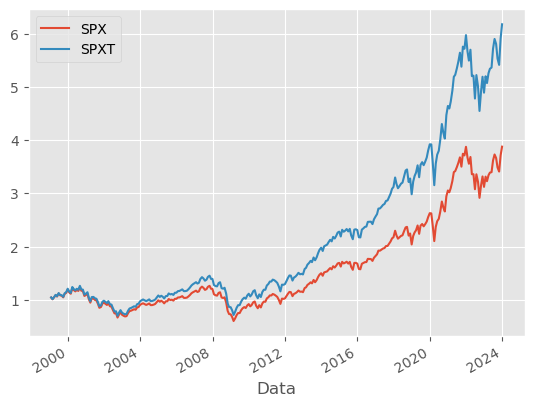

In [9]:
SPX_cum.plot()